In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the csv data
df = pd.read_csv('data.csv')

x = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

In [2]:
# standarize input features
x = (x - x.mean(axis=0)) / x.std(axis=0) # (axis=0) is for colomn calculation

In [3]:
# define softmax function
def softmax(z):
    # -np.max is for avoiding np.exp to explode
    # keepdims is for remaining the dimensions
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [4]:
# inicializeing the weights
np.random.seed(42)        # for reproducibility

n_samples, n_features = x.shape
n_classes = len(np.unique(y))

# every column is for one category
W = np.random.randn(n_features, n_classes)  # shape: (2, 3)
b = np.zeros((1, n_classes))                # shape: (1, 3)

In [5]:
# setup hyper parameters
lr = 0.1          # learning rate
epochs = 1000     # number of training steps
losses = []       # to store loss values for plotting

In [6]:
# setup the loop
for epoch in range(epochs):
    # Forward pass: compute logits and softmax probabilities
    z = x @ W + b                    # shape: (N, C)
    probs = softmax(z)              # shape: (N, C)

    # Cross-entropy loss
    eps = 1e-8                      # to avoid log(0)
    log_likelihood = -np.log(probs[np.arange(len(y)), y] + eps)
    loss = np.mean(log_likelihood)
    losses.append(loss)

    # Backward pass: compute gradients
    dz = probs.copy()
    dz[np.arange(len(y)), y] -= 1         # dL/dz
    dz /= len(y)                          # average over batch

    dW = x.T @ dz                         # shape: (2, 3)
    db = np.sum(dz, axis=0, keepdims=True)  # shape: (1, 3)

    # Update parameters
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")



Epoch 0: Loss = 2.2583
Epoch 100: Loss = 0.3874
Epoch 200: Loss = 0.2861
Epoch 300: Loss = 0.2358
Epoch 400: Loss = 0.2053
Epoch 500: Loss = 0.1848
Epoch 600: Loss = 0.1699
Epoch 700: Loss = 0.1587
Epoch 800: Loss = 0.1498
Epoch 900: Loss = 0.1426


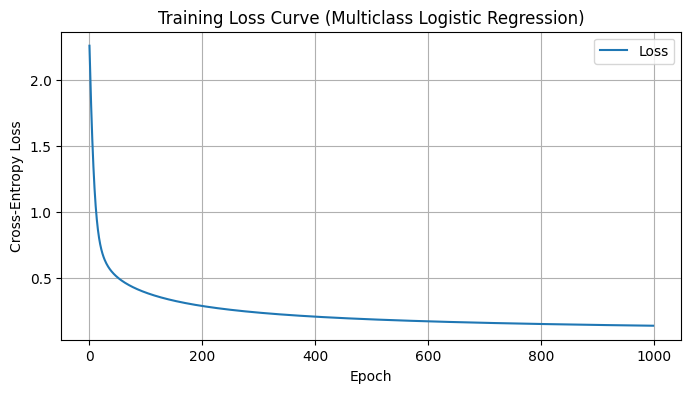

In [7]:
# Plot training loss curve
plt.figure(figsize=(8, 4))
plt.plot(losses, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Curve (Multiclass Logistic Regression)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Predict class labels
z = x @ W + b
probs = softmax(z)
y_pred = np.argmax(probs, axis=1)  # select class with highest probability

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")


Final Accuracy: 95.33%


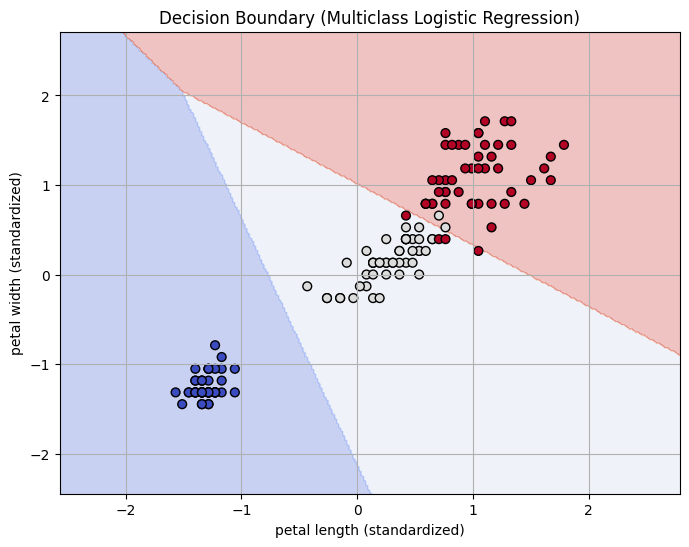

In [9]:
# Generate grid for plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Create grid points and predict their classes
grid = np.c_[xx.ravel(), yy.ravel()]
z = grid @ W + b
probs = softmax(z)
grid_preds = np.argmax(probs, axis=1).reshape(xx.shape)

# Plot decision regions and training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of training data
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=40)
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.title("Decision Boundary (Multiclass Logistic Regression)")
plt.grid(True)
plt.show()